**Task:**  Investigating the performance of a number of Machine Learning procedures to predict whether the customer is going to
encounter difficulties in paying the (increasing!) electricity cost on the basis of a few features (demographic, heating system
power, habits, family composition, etc..)

## Loading Data

In [1]:
#Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings as wrng
wrng.filterwarnings('ignore')
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_confusion_matrix

* Taking the given training set of historical data as "Historical_Data" 

In [2]:
#Reading the given data
Historical_Data=pd.read_csv('C:\\Users\\Thara Jeni\\Desktop\\ML\\CE802_P2_Data.csv')
Historical_Data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.960,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.748800,-2141.760,0,10.27280,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.220,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.178000,-1706.220,0,13.99800,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.180,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.728000,-2513.250,0,11.77800,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.240,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.573100,-2207.670,0,10.11020,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.670,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.828900,507.780,0,10.35120,3246.40,2.04,12121.71,15.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.08380,-4.9960,10155.510,5.2420,-20.982,-5462.268,4.52620,-2.8761,-5.4848,0,...,-3885.89,-3.799653,-1985.520,0,10.37440,2554.20,2.04,15038.61,NaN,False
996,13.66650,-4.3146,12121.110,1.4452,-116.300,-5485.286,4.51470,-2.3400,-4.7273,0,...,-3538.19,-4.375800,-2869.320,0,9.23880,3720.54,2.04,13332.21,NaN,False
997,12.87600,-3.6867,10724.040,3.7860,-27.924,-5450.136,5.53000,-5.3190,-6.8250,0,...,-2683.59,-5.184900,-2408.724,0,9.17134,-4036.00,0.04,12827.37,14.44,True
998,16.77900,-3.9024,10998.210,1.7188,-25.672,-5434.820,4.82050,-2.8479,-4.9253,0,...,-3578.79,-4.709700,-2378.829,1,10.41200,3007.00,0.04,13415.01,NaN,True


# Data Analysis

*Analyzing the given training set of historical data which contains features of each customers & a label representing whether the customer belong to the class of people who had problems with paying their energy bills during the last few months or not.*

In [3]:
print(Historical_Data.shape)

(1000, 22)


In [4]:
Historical_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   int64  
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   int64  
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [5]:
Historical_Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,15.52,False


In [6]:
Historical_Data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,15.045798,-4.304597,9930.685469,2.175746,-32.804599,-5370.578579,5.260013,-4.412875,-5.558608,0.481000,...,5.698292,-3417.225867,-5.232791,-2165.320822,0.507000,10.968717,3133.607898,1.098000,13069.938917,14.713520
std,2.699756,0.614178,2108.672583,1.805525,20.571395,3376.459608,0.853456,2.708330,0.901204,0.499889,...,4.861641,1037.177844,2.015813,739.616151,0.500201,1.739357,1494.941683,0.998816,1587.054314,1.062748
min,12.124140,-7.071000,-4514.190000,0.264400,-176.060000,-12903.460000,4.361290,-14.904000,-9.175000,0.000000,...,-10.010000,-7974.590000,-21.234000,-7087.920000,0.000000,9.124440,-6828.000000,0.040000,3628.410000,11.340000
25%,12.940725,-4.684500,9650.685000,0.832950,-38.405000,-5505.530000,4.629000,-5.650500,-5.927000,0.000000,...,2.630250,-3817.370000,-5.698575,-2426.043750,0.000000,9.666650,2971.900000,0.040000,12454.860000,13.980000
50%,14.174400,-4.170750,10345.740000,1.607400,-26.664000,-5467.898200,4.988750,-3.576750,-5.277250,0.000000,...,5.659950,-3623.790000,-4.480800,-2326.830000,1.000000,10.458100,3510.900000,2.040000,12711.945000,14.665000
75%,16.494750,-3.817700,10774.042500,2.968500,-18.884000,-5429.240000,5.625000,-2.332350,-4.881825,1.000000,...,8.773250,-3303.715000,-3.911055,-2124.907500,1.000000,11.739000,3764.306500,2.040000,13177.410000,15.455000
max,25.326000,-3.530592,21120.810000,9.244000,-12.504656,100070.540000,8.813000,-1.446360,-4.622990,1.000000,...,24.870000,4355.410000,-3.780003,2605.080000,1.000000,18.150000,11218.000000,2.040000,29764.410000,18.150000


In [7]:
Historical_Data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16        int64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object

In [8]:
Historical_Data['Class'].value_counts()

True     506
False    494
Name: Class, dtype: int64

*Note:
     True indicates the Customers who were suffered from the increasing energy prices &
     False indicates the Customers who weren't suffered from the increasing energy prices.*

# Data Visualization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

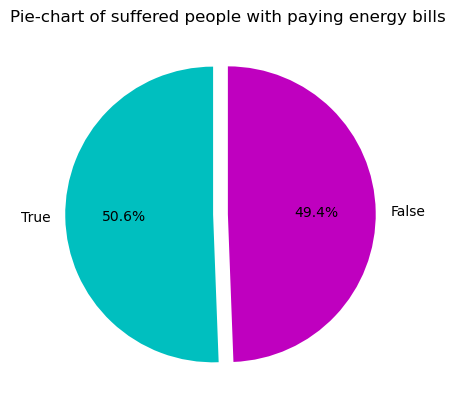

In [10]:
y = np.array([506,494])
mylabels = ["True", "False"]
clr=['c','m']
myexplode = [0.1, 0]

plt.title('Pie-chart of suffered people with paying energy bills')
plt.pie(y, labels = mylabels, explode = myexplode, startangle = 90, colors= clr, autopct='%.1f%%')
plt.show()

# Pre-Processing

### Missing Data

In [11]:
Historical_Data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

*Handling missing values in two ways,one is by droping column which has null values & another one is by filling null values with mean value.*

##### 1) Droping column which has null values 

In [12]:
# deleting the F21 column which has 500 (50%) null values 
Dropped_Historical_Data = Historical_Data.drop(['F21'], axis=1)
Dropped_Historical_Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,5.95576,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,-0.44400,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,3.81800,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,5.30560,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,9.94300,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,False


In [13]:
Dropped_Historical_Data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
Class    0
dtype: int64

##### 2) Filling null values with mean value

In [14]:
Filled_Historical_Data = Historical_Data.fillna(Historical_Data.mean())
Filled_Historical_Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,14.71352,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,14.71352,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,14.71352,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,14.71352,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,15.52000,False


In [15]:
Filled_Historical_Data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

#### Note:
#### Finally we have two null-free cleaned data sets
* "Dropped_Historical_Data" - after deleting the column which had null values 
* "Filled_Historical_Data" - after filling the null values with mean 

### Data Transformation

##### Splitting Data into Training and Testing data

*1) Dropped_Historical_Data*

In [16]:
import matplotlib as mpb
from sklearn.model_selection import train_test_split

X_1 = Dropped_Historical_Data.drop('Class',axis=1)
Y_1 = Dropped_Historical_Data['Class']
X_1_train,X_1_test,Y_1_train,Y_1_test = train_test_split (X_1,Y_1,test_size=0.24, random_state=0)

*2) Filled_Historical_Data*

In [17]:
import matplotlib as mpb
from sklearn.model_selection import train_test_split

X_2 = Filled_Historical_Data.drop('Class',axis=1)
Y_2 = Filled_Historical_Data['Class']
X_2_train,X_2_test,Y_2_train,Y_2_test = train_test_split (X_2,Y_2,test_size=0.24, random_state=0)

##### Scaling and Normalization

In [18]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

#Dropped_Historical_Data 
X_1_train = SS.fit_transform(X_1_train)
X_1_test = SS.fit_transform(X_1_test) 

#Filled_Historical_Data
X_2_train = SS.fit_transform(X_2_train)
X_2_test = SS.fit_transform(X_2_test) 

# Investigating performance of ML Techniques

 *Here we are investigating the performance of five Machine Learning Procedures such are:* 
* Decision Tree Classifier 
* K-Nearest Neighbor Classifier 
* Support Vector Machine Classifier 
* Random Forest Classifier 
* Stochastic Gradient Descent Classifier  

## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier as DTC

*1) Dropped_Historical_Data*

In [20]:
DT_classifier = DTC(criterion = 'entropy', max_depth = 10, max_features = 0.8, splitter = 'best')
DT_classifier.fit(X_1_train,Y_1_train)
predictions_1 = DT_classifier.predict(X_1_test)
print(classification_report(Y_1_test,predictions_1))
DTC_Accuracy_1 = accuracy_score(Y_1_test, predictions_1)
print("DTC_Accuracy_1 =", DTC_Accuracy_1)
DTC_confusion_matrix_1 = confusion_matrix(Y_1_test,predictions_1, labels=[0,1])    

              precision    recall  f1-score   support

       False       0.86      0.78      0.82       123
        True       0.79      0.86      0.82       117

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

DTC_Accuracy_1 = 0.8208333333333333


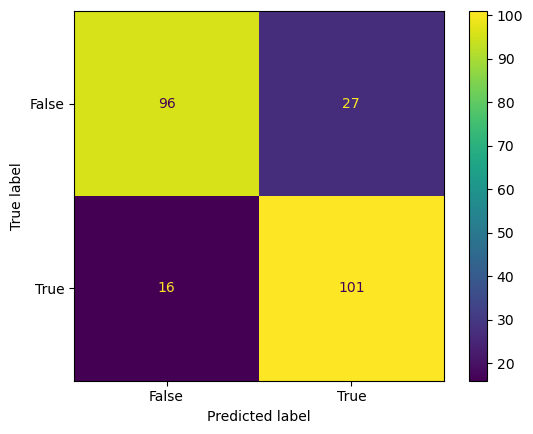

In [21]:
plot_confusion_matrix(DT_classifier, X_1_test, Y_1_test)  
plt.show()

*2) Filled_Historical_Data*

In [22]:
DT_classifier = DTC(criterion = 'entropy', max_depth = 10, max_features = 0.8, splitter = 'best')
DT_classifier.fit(X_2_train,Y_2_train)
predictions_2 = DT_classifier.predict(X_2_test)
print(classification_report(Y_2_test,predictions_2))
DTC_Accuracy_2 = accuracy_score(Y_2_test, predictions_2)
print("DTC_Accuracy_2 =", DTC_Accuracy_2)
DTC_confusion_matrix_2 = confusion_matrix(Y_2_test,predictions_2, labels=[0,1])

              precision    recall  f1-score   support

       False       0.87      0.81      0.84       123
        True       0.82      0.87      0.84       117

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

DTC_Accuracy_2 = 0.8416666666666667


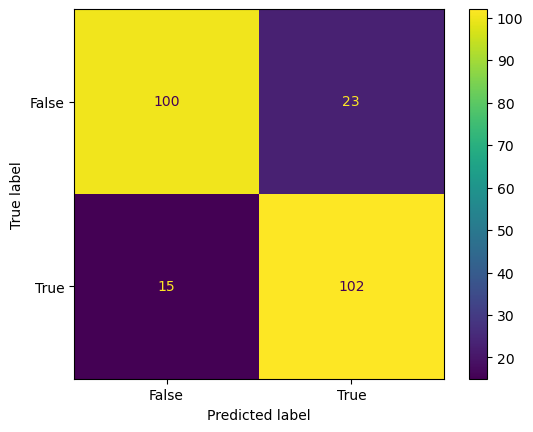

In [23]:
plot_confusion_matrix(DT_classifier, X_2_test, Y_2_test)  
plt.show()

## K-Nearest Neighbor Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from seaborn import load_dataset

*1) Dropped_Historical_Data*

In [25]:
KNN_classifier=KNC(p=1,n_neighbors=5)
KNN_classifier.fit(X_1_train,Y_1_train)
predictions_1=KNN_classifier.predict(X_1_test)
print(classification_report(Y_1_test,predictions_1))
KNNC_Accuracy_1 = accuracy_score(Y_1_test,predictions_1)
print("KNc_Accuracy_1 = ", KNNC_Accuracy_1)
KNNC_confusion_matrix_1 = confusion_matrix(Y_1_test,predictions_1, labels=[0,1])

              precision    recall  f1-score   support

       False       0.64      0.62      0.63       123
        True       0.61      0.64      0.63       117

    accuracy                           0.63       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.63      0.63      0.63       240

KNc_Accuracy_1 =  0.6291666666666667


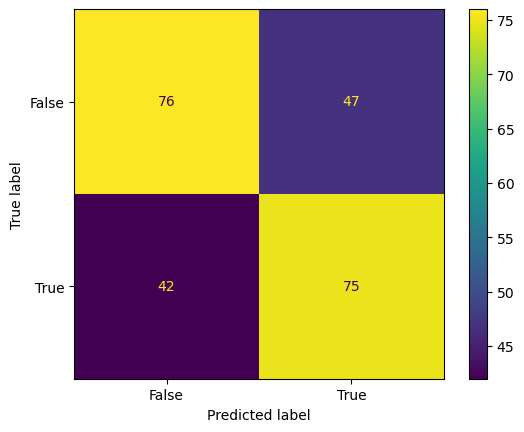

In [26]:
plot_confusion_matrix(KNN_classifier, X_1_test, Y_1_test)  
plt.show()

*2) Filled_Historical_Data*

In [27]:
KNN_classifier=KNC(p=1,n_neighbors=5)
KNN_classifier.fit(X_2_train,Y_2_train)
predictions_2=KNN_classifier.predict(X_2_test)
print(classification_report(Y_2_test,predictions_2))
KNNC_Accuracy_2 = accuracy_score(Y_2_test,predictions_2)
print("KNC_Accuracy_2 = ", KNNC_Accuracy_2)
KNNC_confusion_matrix_2 = confusion_matrix(Y_2_test,predictions_2, labels=[0,1])

              precision    recall  f1-score   support

       False       0.64      0.62      0.63       123
        True       0.61      0.64      0.63       117

    accuracy                           0.63       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.63      0.63      0.63       240

KNC_Accuracy_2 =  0.6291666666666667


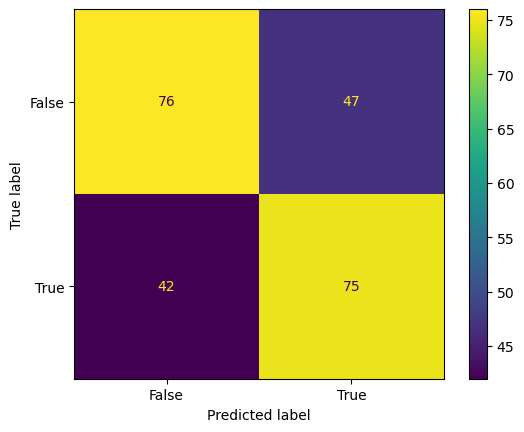

In [28]:
plot_confusion_matrix(KNN_classifier, X_2_test, Y_2_test)  
plt.show()

## Support Vector Machine Classifier

In [29]:
from sklearn import svm
from sklearn.svm import SVC

*1) Dropped_Historical_Data*

In [30]:
SVM_classifier=SVC(kernel='linear', degree=2)
SVM_classifier.fit(X_1_train,Y_1_train)
predictions_1=SVM_classifier.predict(X_1_test)
print(classification_report(Y_1_test,predictions_1))
SVMC_Accuracy_1 = accuracy_score(Y_1_test,predictions_1)
print("SVMC_Accuracy_1 = ", SVMC_Accuracy_1)
SVMC_confusion_matrix_1 = confusion_matrix(Y_1_test,predictions_1, labels=[0,1])

              precision    recall  f1-score   support

       False       0.65      0.64      0.64       123
        True       0.63      0.63      0.63       117

    accuracy                           0.64       240
   macro avg       0.64      0.64      0.64       240
weighted avg       0.64      0.64      0.64       240

SVMC_Accuracy_1 =  0.6375


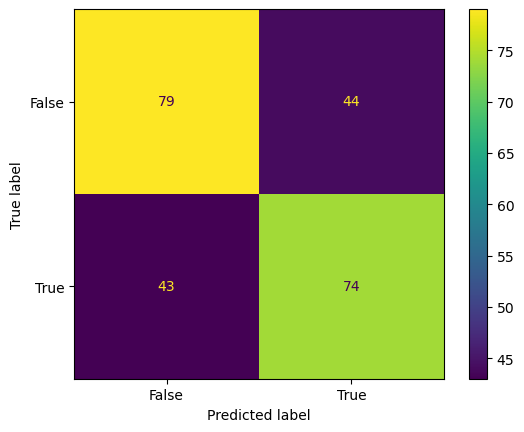

In [31]:
plot_confusion_matrix(SVM_classifier, X_1_test, Y_1_test)  
plt.show()

*2) Filled_Historical_Data*

In [32]:
SVM_classifier=SVC(kernel='linear', degree=2)
SVM_classifier.fit(X_2_train,Y_2_train)
predictions_2=SVM_classifier.predict(X_2_test)
print(classification_report(Y_2_test,predictions_2))
SVMC_Accuracy_2 = accuracy_score(Y_2_test,predictions_2)
print("SVMC_Accuracy_2 = ", SVMC_Accuracy_2)
SVMC_confusion_matrix_2 = confusion_matrix(Y_2_test,predictions_2, labels=[0,1])

              precision    recall  f1-score   support

       False       0.68      0.66      0.67       123
        True       0.65      0.67      0.66       117

    accuracy                           0.66       240
   macro avg       0.66      0.66      0.66       240
weighted avg       0.66      0.66      0.66       240

SVMC_Accuracy_2 =  0.6625


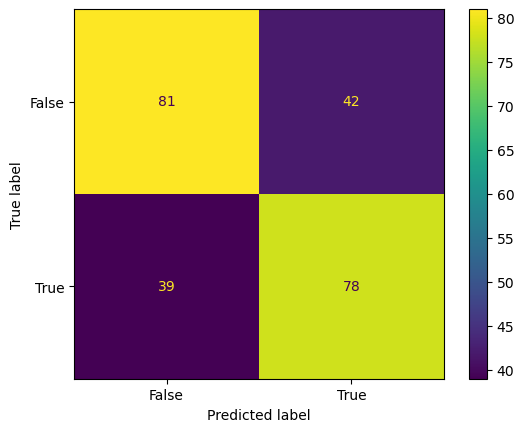

In [33]:
plot_confusion_matrix(SVM_classifier, X_2_test, Y_2_test)  
plt.show()

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier as RFC

*1) Dropped_Historical_Data*

In [35]:
RF_classifier=RFC(n_estimators=100,  criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_1_train,Y_1_train)
predictions_1=RF_classifier.predict(X_1_test)
print(classification_report(Y_1_test,predictions_1))
RFC_Accuracy_1 = accuracy_score(Y_1_test,predictions_1)
print("RFC_Accuracy_1 = ", RFC_Accuracy_1)
RFC_confusion_matrix_1 = confusion_matrix(Y_1_test,predictions_1, labels=[0,1])

              precision    recall  f1-score   support

       False       0.90      0.80      0.85       123
        True       0.82      0.91      0.86       117

    accuracy                           0.85       240
   macro avg       0.86      0.86      0.85       240
weighted avg       0.86      0.85      0.85       240

RFC_Accuracy_1 =  0.8541666666666666


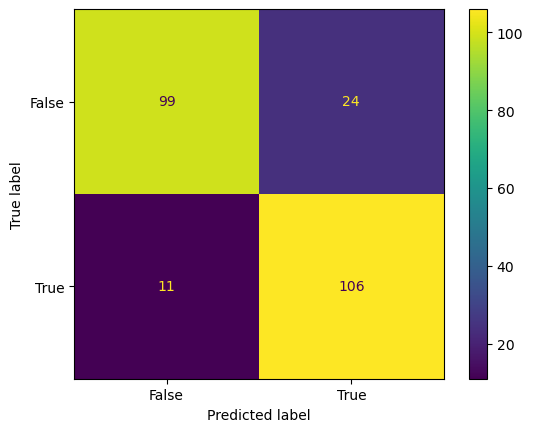

In [36]:
plot_confusion_matrix(RF_classifier, X_1_test, Y_1_test)  
plt.show()

*2) Filled_Historical_Data*

In [37]:
RF_classifier=RFC(n_estimators=100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_2_train,Y_2_train)
predictions_2=RF_classifier.predict(X_2_test)
print(classification_report(Y_2_test,predictions_2))
RFC_Accuracy_2 = accuracy_score(Y_2_test,predictions_2)
print("RFC_Accuracy_2 = ", RFC_Accuracy_2)
RFC_confusion_matrix_2 = confusion_matrix(Y_2_test,predictions_2, labels=[0,1])

              precision    recall  f1-score   support

       False       0.85      0.80      0.83       123
        True       0.80      0.85      0.83       117

    accuracy                           0.82       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.82      0.82       240

RFC_Accuracy_2 =  0.825


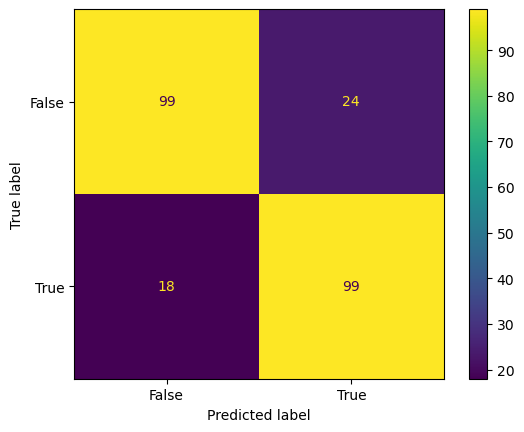

In [38]:
plot_confusion_matrix(RF_classifier, X_2_test, Y_2_test)  
plt.show()

## Stochastic Gradient Descent(SGD) Classifier

In [39]:
from sklearn.linear_model import SGDClassifier as SGDC


*1) Dropped_Historical_Data*

In [40]:
SGD_classifier=SGDC(max_iter=20, tol=-np.infty)
SGD_classifier.fit(X_1_train,Y_1_train)
predictions_1=SGD_classifier.predict(X_1_test)
print(classification_report(Y_1_test,predictions_1))
SGDC_Accuracy_1 = accuracy_score(Y_1_test,predictions_1)
print("SGDC_Accuracy_1 =", SGDC_Accuracy_1)
SGDC_confusion_matrix_1 = confusion_matrix(Y_1_test,predictions_1, labels=[0,1])

              precision    recall  f1-score   support

       False       0.60      0.78      0.68       123
        True       0.66      0.44      0.53       117

    accuracy                           0.62       240
   macro avg       0.63      0.61      0.60       240
weighted avg       0.63      0.62      0.61       240

SGDC_Accuracy_1 = 0.6166666666666667


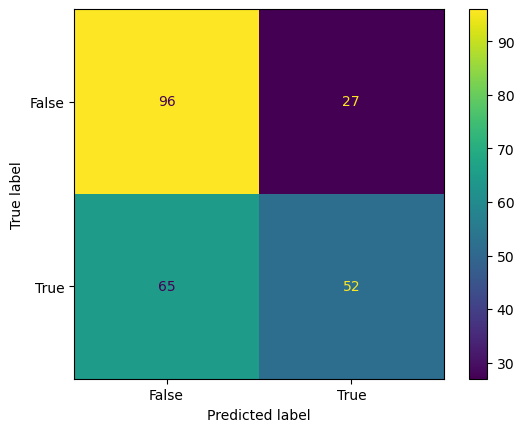

In [41]:
plot_confusion_matrix(SGD_classifier, X_1_test, Y_1_test)  
plt.show()

*2) Filled_Historical_Data*

In [42]:
SGD_classifier=SGDC(max_iter=20, tol=-np.infty)
SGD_classifier.fit(X_2_train,Y_2_train)
predictions_2=SGD_classifier.predict(X_2_test)
print(classification_report(Y_2_test,predictions_2))
SGDC_Accuracy_2 = accuracy_score(Y_2_test,predictions_2)
print("SGDC_Accuracy_2 =", SGDC_Accuracy_2)
SGDC_confusion_matrix_2 = confusion_matrix(Y_2_test,predictions_2, labels=[0,1])

              precision    recall  f1-score   support

       False       0.70      0.61      0.65       123
        True       0.64      0.73      0.68       117

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240

SGDC_Accuracy_2 = 0.6666666666666666


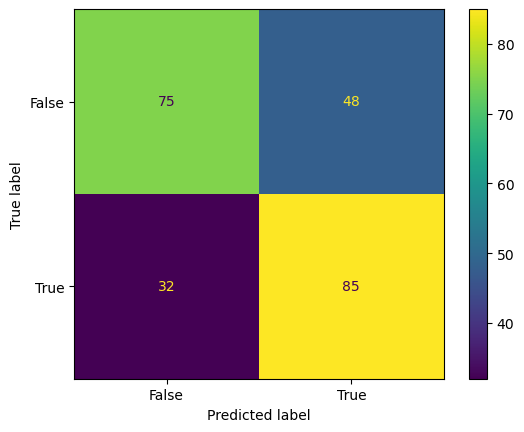

In [43]:
plot_confusion_matrix(SGD_classifier, X_2_test, Y_2_test)  
plt.show()

## Predictive Analysis 

To predict best Machine Learning procedure, comparing the accuracy value & confusion matrix of five performed procedures with Dropped_Historical_Data and Filled_Historical_Data. 

###### Note:
* Accuracy_1 and Confusion Matrix_1 refers Dropped_Historical_Data
* Accuracy_2 and Confusion Matrix_2 refers Filled_Historical_Data 

In [44]:
# table
from tabulate import tabulate
table_data = [['Classifiers','Accuracy_1', 'Accuracy_2' ],
             ['DTC' , DTC_Accuracy_1,  DTC_Accuracy_2 ],
             ['KNNC', KNNC_Accuracy_1,  KNNC_Accuracy_2],
             ['SVMC' ,  SVMC_Accuracy_1,  SVMC_Accuracy_2],
             ['RFC',  RFC_Accuracy_1,  RFC_Accuracy_2],
             ['SGDC',  SGDC_Accuracy_1,  SGDC_Accuracy_2]]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒═══════════════╤══════════════╤══════════════╕
│ Classifiers   │   Accuracy_1 │   Accuracy_2 │
╞═══════════════╪══════════════╪══════════════╡
│ DTC           │     0.820833 │     0.841667 │
├───────────────┼──────────────┼──────────────┤
│ KNNC          │     0.629167 │     0.629167 │
├───────────────┼──────────────┼──────────────┤
│ SVMC          │     0.6375   │     0.6625   │
├───────────────┼──────────────┼──────────────┤
│ RFC           │     0.854167 │     0.825    │
├───────────────┼──────────────┼──────────────┤
│ SGDC          │     0.616667 │     0.666667 │
╘═══════════════╧══════════════╧══════════════╛


In [45]:
# table
from tabulate import tabulate
table_data = [['Classifiers', 'Confusion Matrix_1', 'Confusion Matrix_2' ],
             ['DTC' , DTC_confusion_matrix_1,  DTC_confusion_matrix_2 ],
             ['KNNC', KNNC_confusion_matrix_1,  KNNC_confusion_matrix_2],
             ['SVMC' ,  SVMC_confusion_matrix_1,  SVMC_confusion_matrix_2],
             ['RFC',  RFC_confusion_matrix_1,  RFC_confusion_matrix_2],
             ['SGDC',  SGDC_confusion_matrix_1,  SGDC_confusion_matrix_2]]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid"))

╒═══════════════╤══════════════════════╤══════════════════════╕
│ Classifiers   │ Confusion Matrix_1   │ Confusion Matrix_2   │
╞═══════════════╪══════════════════════╪══════════════════════╡
│ DTC           │ [[ 96  27]           │ [[100  23]           │
│               │  [ 16 101]]          │  [ 15 102]]          │
├───────────────┼──────────────────────┼──────────────────────┤
│ KNNC          │ [[76 47]             │ [[76 47]             │
│               │  [42 75]]            │  [42 75]]            │
├───────────────┼──────────────────────┼──────────────────────┤
│ SVMC          │ [[79 44]             │ [[81 42]             │
│               │  [43 74]]            │  [39 78]]            │
├───────────────┼──────────────────────┼──────────────────────┤
│ RFC           │ [[ 99  24]           │ [[99 24]             │
│               │  [ 11 106]]          │  [18 99]]            │
├───────────────┼──────────────────────┼──────────────────────┤
│ SGDC          │ [[96 27]             │

In [46]:
# Dropped_Historical_Data

Classifiers = ["Decision Tree Classifier", "K-Nearest Neighbor Classifier" , "Support Vector Machine Classifier", "Random Forest Classifier" , "Stochastic Gradient Descent(SGD) Classifier"]

classifiers = [DTC(criterion = 'entropy', random_state = 0, max_depth = 10, splitter = 'best', 
               min_samples_split = 3, max_features = None),
               KNC(p=1,n_neighbors=5),
               SVC(kernel='linear', degree=2),
               RFC(n_estimators = 100, criterion = 'entropy', random_state = 0),
               SGDC(max_iter=20, tol=-np.infty)
              ]
scores = []
for Classifier, classifier in zip(Classifiers, classifiers):
    classifier.fit(X_1_train, Y_1_train)
    Score = classifier.score(X_1_test, Y_1_test)
    scores.append(Score)
    
    
Dropped_Historical_Data = pd.DataFrame()
Dropped_Historical_Data['Classifier'] = Classifiers
Dropped_Historical_Data['Score'] = scores
Dropped_Historical_Data

,Classifier,Score
0,Decision Tree Classifier,0.841667
1,K-Nearest Neighbor Classifier,0.629167
2,Support Vector Machine Classifier,0.637500
3,Random Forest Classifier,0.854167
4,Stochastic Gradient Descent(SGD) Classifier,0.554167


In [47]:
# Filled_Historical_Data
Classifiers = ["Decision Tree Classifier", "K-Nearest Neighbor Classifier" , "Support Vector Machine Classifier", "Random Forest Classifier" , "Stochastic Gradient Descent(SGD) Classifier"]

classifiers = [DTC(criterion = 'entropy', random_state = 0, max_depth = 10, splitter = 'best', 
               min_samples_split = 3, max_features = None),
               KNC(p=1,n_neighbors=5),
               SVC(kernel='linear', degree=2),
               RFC(n_estimators = 100, criterion = 'entropy', random_state = 0),
               SGDC(max_iter=20, tol=-np.infty)
              ]
scores = []
for Classifier, classifier in zip(Classifiers, classifiers):
    classifier.fit(X_2_train, Y_2_train)
    Score = classifier.score(X_2_test, Y_2_test)
    scores.append(Score)
    
    
Filled_Historical_Data = pd.DataFrame()
Filled_Historical_Data['Classifier'] = Classifiers
Filled_Historical_Data['Score'] = scores
Filled_Historical_Data

,Classifier,Score
0,Decision Tree Classifier,0.854167
1,K-Nearest Neighbor Classifier,0.629167
2,Support Vector Machine Classifier,0.662500
3,Random Forest Classifier,0.825000
4,Stochastic Gradient Descent(SGD) Classifier,0.604167


From the obtainted "scores, Accuracy & confusion Matrix" in the above tables,we get
* Decision Tree Classifier predicts 84% (with Dropped_Historical_Data) and 85% (with Filled_Historical_Data)
* Random Forest Classifier predicts 85% (with Dropped_Historical_Data) and 83% (with Filled_Historical_Data)


Since now we investigated the five Machine Learning Procedures along with two data sets. We obtained similar results between Dropped_Historical_Data & Filled_Historical_Data and also if we have more than 75% null values in a column, the suggested best method to deal missing values is drop. But from our hypothesis, the given data set has only 50% null values. so here the best method to deal missing values is filling them with imputation methods. 

### Since we are considering Filled_Historical_Data as best, we conclude that the Decision Tree Classifier has best performance with 85% of predictions.

# Prediction on a hold-out test set

In [48]:
# Load the test data
test_df = pd.read_csv('C:\\Users\\Thara Jeni\\Desktop\\ML\\CE802_P2_Test.csv')
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,12.19434,-4.04080,12708.210,0.8192,-26.0320,-5646.140,5.4150,-1.91220,-4.69020,0,...,668.41,-3.889080,-2164.230,0,10.7196,3054.800,0.04,12826.86,NaN,NaN
1,19.70700,-5.18200,9651.810,1.0418,-19.4540,-5541.680,5.2977,-6.02700,-5.70300,1,...,-3801.77,-3.981990,-2175.450,0,12.6300,3427.200,0.04,13053.51,14.37,NaN
2,13.80600,-5.71600,10903.710,0.4244,-50.7200,-5488.610,5.2426,-4.63500,-5.26470,0,...,-3133.29,-5.562300,-2533.920,1,11.4600,3663.620,2.04,13007.01,NaN,NaN
3,13.30020,-5.03500,10830.030,1.1048,-28.1660,-5395.760,4.6071,-1.56057,-5.96500,0,...,-4097.59,-4.521900,-1490.520,0,13.0920,3343.800,2.04,12465.30,NaN,NaN
4,14.20890,-3.56282,9547.110,3.0220,-38.2200,-5389.220,5.3580,-4.06650,-5.25200,1,...,-3419.89,-7.818000,-2260.410,1,14.2720,3763.838,2.04,12859.71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.90840,-3.65420,10551.801,3.2120,-47.4200,-5456.602,6.9410,-1.79310,-7.91400,0,...,-3937.19,-4.667700,-1739.220,0,10.6118,3198.600,2.04,12511.56,15.32,NaN
996,14.11590,-3.55414,10907.610,2.5160,-60.1400,-5480.558,5.0525,-3.49680,-5.33470,1,...,-3574.09,-4.063680,-2418.507,0,9.7280,3155.000,0.04,12256.92,15.52,NaN
997,13.81770,-4.09350,10689.600,0.7696,-18.0840,-5493.040,7.3360,-8.34600,-5.31260,0,...,-3280.69,-7.314000,-2377.140,0,12.4480,3355.200,0.04,12722.64,16.17,NaN
998,12.93780,-4.47550,10108.710,2.6080,-24.1540,-5476.712,5.3160,-7.30800,-4.63681,0,...,-3401.79,-3.833070,-2376.030,0,14.2000,3676.300,0.04,12434.52,13.78,NaN


In [49]:
# Make sure you work on a copy
test_data= test_df.iloc[:,:-1].copy()
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,12.19434,-4.04080,12708.21,0.8192,-26.032,-5646.14,5.4150,-1.91220,-4.6902,0,...,5.83125,668.41,-3.88908,-2164.23,0,10.7196,3054.800,0.04,12826.86,NaN
1,19.70700,-5.18200,9651.81,1.0418,-19.454,-5541.68,5.2977,-6.02700,-5.7030,1,...,6.21360,-3801.77,-3.98199,-2175.45,0,12.6300,3427.200,0.04,13053.51,14.37
2,13.80600,-5.71600,10903.71,0.4244,-50.720,-5488.61,5.2426,-4.63500,-5.2647,0,...,10.55700,-3133.29,-5.56230,-2533.92,1,11.4600,3663.620,2.04,13007.01,NaN
3,13.30020,-5.03500,10830.03,1.1048,-28.166,-5395.76,4.6071,-1.56057,-5.9650,0,...,5.46110,-4097.59,-4.52190,-1490.52,0,13.0920,3343.800,2.04,12465.30,NaN
4,14.20890,-3.56282,9547.11,3.0220,-38.220,-5389.22,5.3580,-4.06650,-5.2520,1,...,4.68100,-3419.89,-7.81800,-2260.41,1,14.2720,3763.838,2.04,12859.71,NaN


##### Pre-processing the test data

In [50]:
cleaned_test_data = test_data.fillna(test_data.mean())
cleaned_test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,12.19434,-4.04080,12708.21,0.8192,-26.032,-5646.14,5.4150,-1.91220,-4.6902,0,...,5.83125,668.41,-3.88908,-2164.23,0,10.7196,3054.800,0.04,12826.86,14.72638
1,19.70700,-5.18200,9651.81,1.0418,-19.454,-5541.68,5.2977,-6.02700,-5.7030,1,...,6.21360,-3801.77,-3.98199,-2175.45,0,12.6300,3427.200,0.04,13053.51,14.37000
2,13.80600,-5.71600,10903.71,0.4244,-50.720,-5488.61,5.2426,-4.63500,-5.2647,0,...,10.55700,-3133.29,-5.56230,-2533.92,1,11.4600,3663.620,2.04,13007.01,14.72638
3,13.30020,-5.03500,10830.03,1.1048,-28.166,-5395.76,4.6071,-1.56057,-5.9650,0,...,5.46110,-4097.59,-4.52190,-1490.52,0,13.0920,3343.800,2.04,12465.30,14.72638
4,14.20890,-3.56282,9547.11,3.0220,-38.220,-5389.22,5.3580,-4.06650,-5.2520,1,...,4.68100,-3419.89,-7.81800,-2260.41,1,14.2720,3763.838,2.04,12859.71,14.72638


In [51]:
Predicted=DT_classifier.predict(cleaned_test_data)
test_df['Class'] = Predicted
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,12.19434,-4.04080,12708.21,0.8192,-26.032,-5646.14,5.4150,-1.91220,-4.6902,0,...,668.41,-3.88908,-2164.23,0,10.7196,3054.800,0.04,12826.86,NaN,False
1,19.70700,-5.18200,9651.81,1.0418,-19.454,-5541.68,5.2977,-6.02700,-5.7030,1,...,-3801.77,-3.98199,-2175.45,0,12.6300,3427.200,0.04,13053.51,14.37,True
2,13.80600,-5.71600,10903.71,0.4244,-50.720,-5488.61,5.2426,-4.63500,-5.2647,0,...,-3133.29,-5.56230,-2533.92,1,11.4600,3663.620,2.04,13007.01,NaN,False
3,13.30020,-5.03500,10830.03,1.1048,-28.166,-5395.76,4.6071,-1.56057,-5.9650,0,...,-4097.59,-4.52190,-1490.52,0,13.0920,3343.800,2.04,12465.30,NaN,False
4,14.20890,-3.56282,9547.11,3.0220,-38.220,-5389.22,5.3580,-4.06650,-5.2520,1,...,-3419.89,-7.81800,-2260.41,1,14.2720,3763.838,2.04,12859.71,NaN,True


In [52]:
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = Predicted

In [53]:
# Save to the destination file
test_df.to_csv('C:\\Users\\Thara Jeni\\Desktop\\ML\\CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [55]:
# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('C:\\Users\\Thara Jeni\\Desktop\\ML\\CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('C:\\Users\\Thara Jeni\\Desktop\\ML\\CE802_P2_Test_Predictions.csv').iloc[:,:-1])